# 실습과제#5 Training Models[1] - Linear Regression
학번:  2019250059                   
이름: 한민욱

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [3]:
%cd /content/drive/MyDrive/Practice/

[Errno 2] No such file or directory: '/content/drive/MyDrive/Practice/'
/content


In [4]:
import sys
assert sys.version_info >= (3,5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images",CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
  print("Saving figure",fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi = resolution)

  import warnings
  warnings.filterwarnings(action="ignore",message="^internal gelsd")
  #numpy 패키지를 import하고, 난수 발생 시드를 설정하기 위해 np.random.seed(42)를 사용합니다. 이렇게 하면 난수 발생 시드가 고정되어 재현성을 확보할 수 있습니다.

#matplotlib 패키지를 import하고, mpl 객체를 사용하여 그래프의 레이블 크기를 설정합니다.

#프로젝트의 루트 디렉토리, 챕터 ID, 이미지 파일을 저장할 경로 등을 설정합니다.
#save_fig 함수는 그래프를 이미지 파일로 저장하는 함수입니다. fig_id는 그래프의 식별자이고, tight_layout은 그래프의 여백을 조절하는 매개변수입니다. fig_extension은 저장할 이미지 파일의 확장자이고, resolution은 이미지의 해상도를 설정합니다.

In [5]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.rand(100,1)

Saving figure generated_data_plot


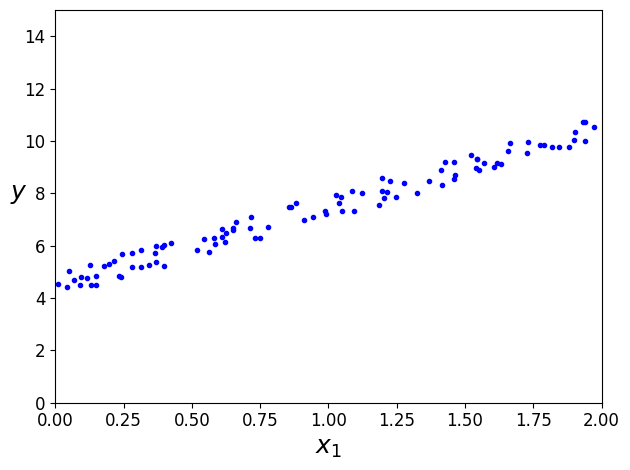

In [6]:
plt.plot(X,y,"b.")
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])
save_fig("generated_data_plot")
plt.show()
print("2019250059 한민욱")
#plt.plot(X, y, "b.")는 X와 y 데이터를 산점도 그래프로 그리는 부분입니다. "b."는 파란색 점으로 표시하라는 의미입니다.

#plt.xlabel("$x_1$", fontsize=18)는 x축의 레이블을 "$x_1$"로 설정하고, 글꼴 크기를 18로 지정하는 부분입니다.

#plt.ylabel("$y$", rotation=0, fontsize=18)는 y축의 레이블을 "$y$"로 설정하고, 레이블을 회전시키지 않고(0도), 글꼴 크기를 18로 지정하는 부분입니다.

In [7]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [8]:
theta_best

array([[4.51359766],
       [2.98323418]])

In [9]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.51359766],
       [10.48006601]])

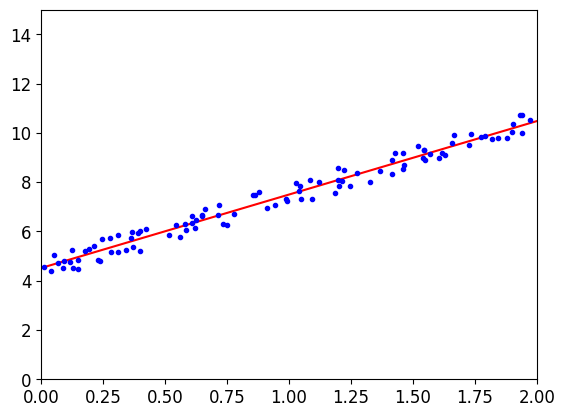

In [10]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()
print("2019250059 한민욱")

Saving figure linear_model_predictions_plot


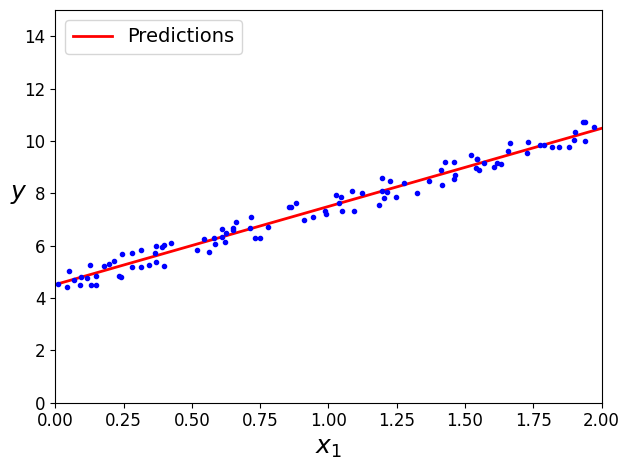

In [11]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X,y,"b.")
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0,2,0,15])
save_fig("linear_model_predictions_plot")
plt.show()
print("2019250059 한민욱")
#plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")는 X_new와 y_predict를 선 그래프로 그리는 부분입니다. "r-"은 빨간색 선으로 그리고, 선의 두께는 2로 지정되었습니다. 라벨은 "Predictions"로 지정되었습니다.

#plt.plot(X, y, "b.")는 X와 y 데이터를 산점도 그래프로 그리는 부분입니다. "b."는 파란색 점으로 표시하라는 의미입니다.

#plt.xlabel("$x_1$", fontsize=18)는 x축의 레이블을 "$x_1$"로 설정하고, 글꼴 크기를 18로 지정하는 부분입니다.

In [12]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_
print("2019250059 한민욱")

(array([4.51359766]), array([[2.98323418]]))

In [13]:
lin_reg.predict(X_new)

array([[ 4.51359766],
       [10.48006601]])

In [14]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y , rcond=1e-6)
theta_best_svd

array([[4.51359766],
       [2.98323418]])

In [15]:
np.linalg.pinv(X_b).dot(y)

array([[4.51359766],
       [2.98323418]])

In [16]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
  gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
  theta = theta - eta *gradients

In [17]:
theta

array([[4.51359766],
       [2.98323418]])

In [18]:
X_new_b.dot(theta)

array([[ 4.51359766],
       [10.48006601]])

In [19]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

#plot_gradient_descent(theta, eta, theta_path=None)는 경사 하강법을 시각화하는 함수입니다. theta는 초기 모델의 파라미터, eta는 학습 속도를 나타냅니다. theta_path는 theta의 변화를 저장할 리스트입니다.

#먼저, plt.plot(X, y, "b.")는 X와 y 데이터를 파란색 점으로 표시하는 부분입니다.

#n_iterations = 1000은 반복 횟수를 1000으로 설정합니다.

#for iteration in range(n_iterations):는 주어진 반복 횟수만큼 반복합니다.

#if iteration < 10:은 처음 10회에 대해서만 그래프를 그리는 조건문입니다. y_predict = X_new_b.dot(theta)로 예측값을 계산하고, style = "b-" if iteration > 0 else "r--"으로 그래프의 스타일을 지정합니다. 첫 번째 그래프는 빨간 점선으로 그리고, 그 이후에는 파란 실선으로 그립니다.

Saving figure gradient_descent_plot


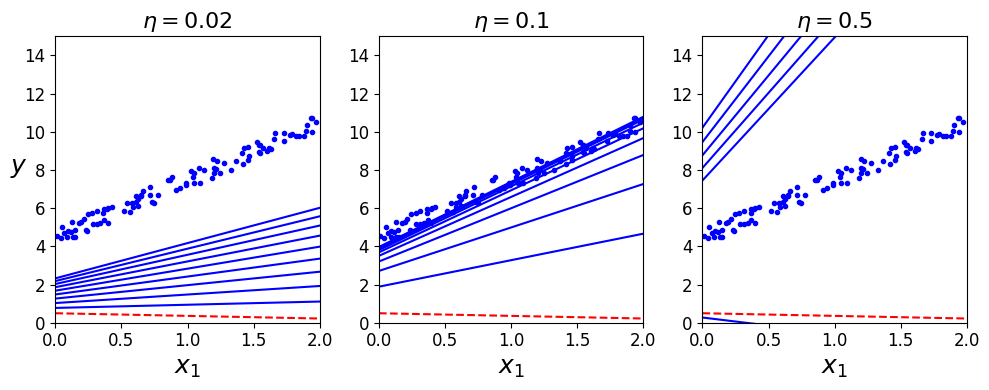

In [20]:
np.random.seed(42)
theta = np.random.randn(2,1)

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()
print("2019250059 한민욱")

In [21]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

Saving figure sgd_plot


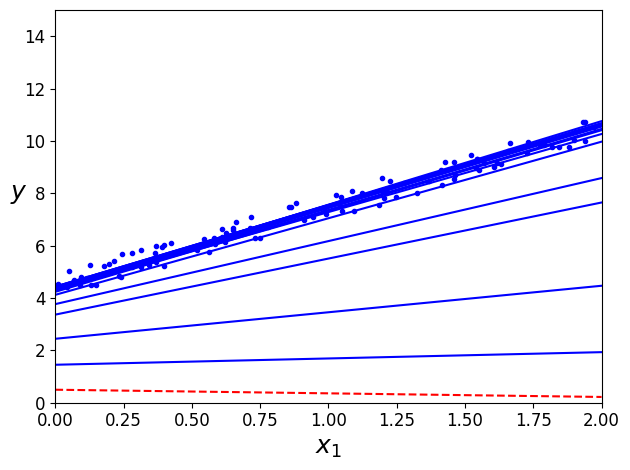

In [22]:
n_epochs = 50
t0, t1 = 5, 50
def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        learning_rate = learning_schedule(epoch * m + i)
        theta = theta - learning_rate * gradients
        theta_path_sgd.append(theta)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("sgd_plot")
plt.show()
print("2019250059 한민욱")
#초기 설정: epoch의 수(n_epochs), 학습 스케줄 함수(learning_schedule), 파라미터(theta) 등을 설정합니다.
#주어진 epoch 수(n_epochs)만큼 반복합니다.
#데이터셋(X, y)의 샘플을 랜덤하게 선택하여 확률적 경사 하강법을 수행합니다.
#첫 번째 epoch에서 처음 20개의 샘플에 대해 예측값을 계산하고 시각화합니다.
#랜덤하게 선택된 샘플에 대해 경사(gradient)를 계산하고, 학습률(learning_rate)을 계산하여 파라미터(theta)를 업데이트합니다.
#업데이트된 파라미터(theta)를 기록합니다.

In [23]:
theta

array([[4.51548062],
       [2.9775157 ]])

In [24]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [25]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.51603434]), array([3.00059188]))

In [26]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)
#theta_path_mgd라는 빈 리스트를 생성합니다. 이 리스트는 업데이트된 theta 값을 저장할 목적으로 사용됩니다.

##n_iterations 변수에는 반복 횟수인 50을, minibatch_size 변수에는 미니배치 크기인 20을 할당합니다.

#np.random.seed(42)를 사용하여 난수 발생 시드를 설정하고, theta 변수에는 크기가 2x1인 랜덤한 초기값을 할당합니다.

#learning_schedule 함수는 학습률을 조절하기 위한 함수입니다. t0와 t1은 하이퍼파라미터로, 학습 스케줄을 조절하는 데 사용됩니다.

In [27]:
theta

array([[4.52651397],
       [2.99723869]])

In [28]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

Saving figure gradient_descent_paths_plot


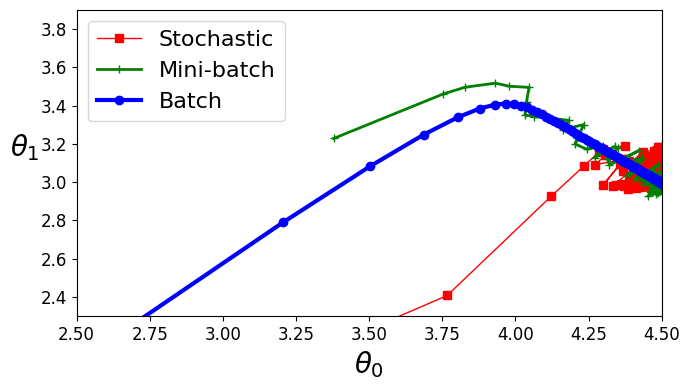

In [29]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
save_fig("gradient_descent_paths_plot")
plt.show()
print("2019250059 한민욱")